Importar las librerias necesarias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import ast

Leer los datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/CSVs/reviews_hoteles.csv') #reviews

## CALIDAD DE LOS DATOS

### Visión General

Comprender las dimensiones del dataset visaulizando las primeras 5 filas.

In [ ]:
df.head(5)

,Unnamed: 0,user_id,name,time,rating,text,pics,resp,gmap_id,url_origen,etl_timestamp
0,0,1.149921e+20,Cherena Dukes,1574336225144,4,Nice homes in fairly new subdivisions.,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00
1,1,1.096825e+20,Lee Morrison,1543167503668,2,Roads are terrible. Neighbors park in yards. ...,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00
2,2,1.016355e+20,Yolanda Lee,1511012869245,4,NaN,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00
3,3,1.179038e+20,Alex Montgomery,1470080056470,5,NaN,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00
4,4,1.091065e+20,Kellye Talley,1523618730754,5,NaN,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00


Eliminamos la columna que se generaró en el proceso de extracción y filtrado.

In [ ]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

¿Qué tamaño tiene el dataframe?

In [ ]:
df.shape

(133023, 10)


¿Qué tipo de datos contiene cada columna? 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133023 entries, 0 to 133022
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        133023 non-null  float64
 1   name           133023 non-null  object 
 2   time           133023 non-null  int64  
 3   rating         133023 non-null  int64  
 4   text           79718 non-null   object 
 5   pics           5689 non-null    object 
 6   resp           10751 non-null   object 
 7   gmap_id        133023 non-null  object 
 8   url_origen     133023 non-null  object 
 9   etl_timestamp  133023 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 10.1+ MB


¿Cuantas dimensiones de cada tipo de dato tenemos en el dataframe?

In [ ]:
df.dtypes.value_counts()

object     7
int64      2
float64    1
dtype: int64

###Valores Faltantes 

Analicemos los valores nulos ¿Cuántos valores nulos tenemos en el total en el conjunto de datos?

In [ ]:
df.isnull().sum().sum()

302911

¿Cuántos tenemos por cada dimensión?

In [ ]:
df.isnull().sum()

user_id               0
name                  0
time                  0
rating                0
text              53305
pics             127334
resp             122272
gmap_id               0
url_origen            0
etl_timestamp         0
dtype: int64

Graficamente observamos los valores nulos 

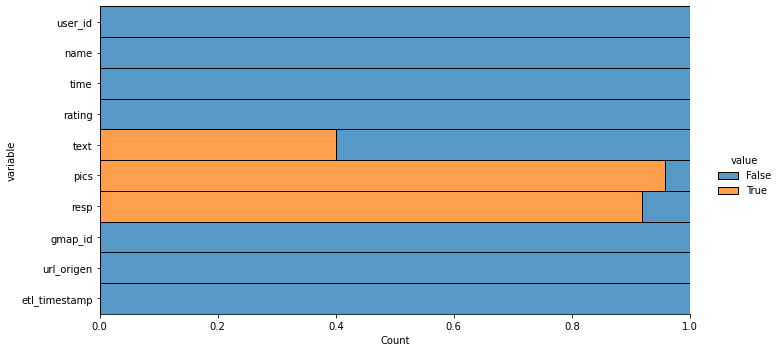

In [ ]:
(df.isnull().melt().pipe(lambda df: (sns.displot(data=df,y='variable',hue='value',multiple='fill',aspect=2))))

### Tipos de Dato

In [4]:
df["time"]= pd.to_datetime(df["time"],unit='ms').dt.strftime('%Y-%m-%d %H:%M:%S')

In [5]:
df.head(5)

,Unnamed: 0,user_id,name,time,rating,text,pics,resp,gmap_id,url_origen,etl_timestamp
0,0,1.149921e+20,Cherena Dukes,2019-11-21 11:37:05,4,Nice homes in fairly new subdivisions.,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00
1,1,1.096825e+20,Lee Morrison,2018-11-25 17:38:23,2,Roads are terrible. Neighbors park in yards. ...,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00
2,2,1.016355e+20,Yolanda Lee,2017-11-18 13:47:49,4,NaN,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00
3,3,1.179038e+20,Alex Montgomery,2016-08-01 19:34:16,5,NaN,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00
4,4,1.091065e+20,Kellye Talley,2018-04-13 11:25:30,5,NaN,NaN,NaN,0x88892dc32d67742d:0x91dc8f0e85b37f5e,d:/Henry/Proyecto Final/Data/Reviews/review-Al...,2023-02-22 02:36:00


In [6]:
df.time.min(),df.time.max() 

('2007-09-19 02:41:24', '2021-09-06 15:46:35')

In [7]:
df.time.value_counts()

2019-12-03 22:44:57    5
2019-02-25 02:13:22    4
2019-04-18 20:42:13    4
2018-01-19 00:47:54    3
2016-10-11 14:59:33    3
                      ..
2020-08-16 02:07:31    1
2019-09-23 17:49:13    1
2018-10-14 00:25:25    1
2017-06-06 05:54:02    1
2017-10-05 02:37:50    1
Name: time, Length: 128612, dtype: int64

In [8]:
df[['Fecha', 'Hora']] = df['time'].str.split(' ', 1, expand=True)

In [9]:
df.Fecha.value_counts()

2019-08-18    202
2019-07-21    179
2019-07-10    176
2018-08-12    175
2019-05-19    169
             ... 
2013-04-19      1
2011-12-10      1
2015-04-23      1
2007-09-19      1
2011-02-04      1
Name: Fecha, Length: 3060, dtype: int64

In [10]:
df.Hora.value_counts()

02:28:46    11
02:36:01    11
01:31:45    10
02:05:11    10
03:18:41    10
            ..
13:32:20     1
10:19:18     1
11:20:34     1
11:49:54     1
05:56:31     1
Name: Hora, Length: 63917, dtype: int64

In [11]:
df['Fecha'] = pd.to_datetime(df.Fecha, format='%Y-%m-%d')

In [12]:
df['Fecha'] = df['Fecha'].dt.strftime('%Y-%m-%d')

Serie de tiempo de los valores de rating

Text(0.5, 1.0, 'Comportamiento del rating a través del tiempo')

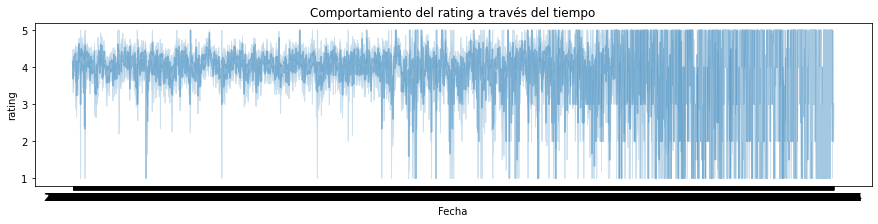

In [13]:
plt.figure(figsize = (15,3))
sns.lineplot(x='Fecha',y='rating',data = df,alpha=0.4)
plt.title('Comportamiento del rating a través del tiempo')


Text(0.5, 1.0, 'Comportamiento del rating a través del tiempo')

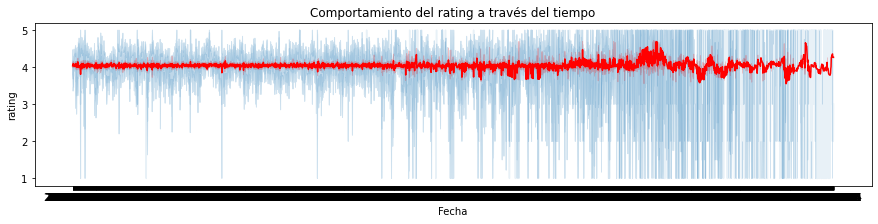

In [14]:
df['pro_mov'] = df.rating.rolling(3000).mean()
plt.figure(figsize = (15,3))
sns.lineplot(x='Fecha',y='rating',data = df,alpha=0.1)
sns.lineplot(x='Fecha',y='pro_mov',data = df,color="r")
plt.title('Comportamiento del rating a través del tiempo')

### Valores duplicados

Analizamos si existen registros duplicados en todo el dataframe. Obviamente obtenemos cero por el id único por registro. 


In [ ]:
df.duplicated().sum()

4324

Analizamos las coincidencias teniendo en cuenta determinadas columnas.

In [ ]:
df.duplicated(subset=['name','time','text','rating','gmap_id','pics', 'resp']).sum()

4338

### Valores Atípicos

#### Variables Numéricas

Visión General

In [ ]:
df.describe()

,user_id,rating,response
count,1.330230e+05,133023.000000,133023.000000
mean,1.093279e+20,4.044083,0.080821
std,5.270775e+18,1.300562,0.272560
min,1.000003e+20,1.000000,0.000000
25%,1.048033e+20,3.000000,0.000000
50%,1.093030e+20,5.000000,0.000000
75%,1.138995e+20,5.000000,0.000000
max,1.184467e+20,5.000000,1.000000


#####Rating

Analizamos los valores únicos que toma la columna 

In [ ]:
df['rating'].unique()

array([4, 2, 5, 3, 1])

Observar la distribución de los datos en la columna rating

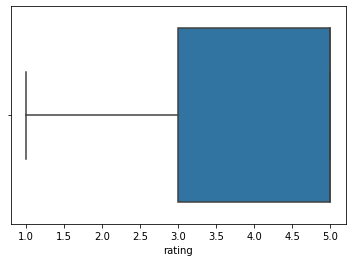

In [ ]:
sns.boxplot(x=df["rating"])

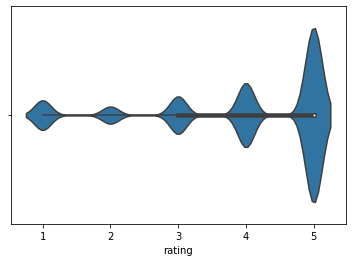

In [ ]:
sns.violinplot(x=df["rating"])

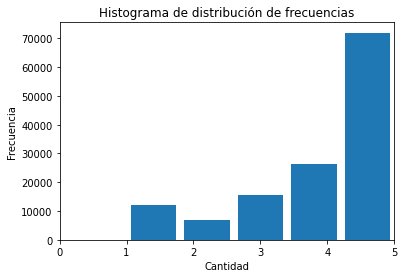

In [ ]:
plt.hist(x=df['rating'], bins=5, rwidth=0.85)
plt.title('Histograma de distribución de frecuencias')
plt.xlim(0,5) #limitamos el eje x 
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show() #dibujamos el histograma

#### Variables Categóricas

##### Name

Cantidad de reseñas

In [ ]:
df.name.count()

133023

Cantidad de USUARIOS

In [ ]:
len(df.name.unique())

118087

Reseñas por usuario

In [ ]:
df.name.value_counts()

A Google User       70
John                21
Mike                19
David               16
Paul                16
                    ..
Jordan Turner        1
Greg Drummond        1
Jon Bentley          1
Ronnie Wilkerson     1
toosly 4u            1
Name: name, Length: 118087, dtype: int64

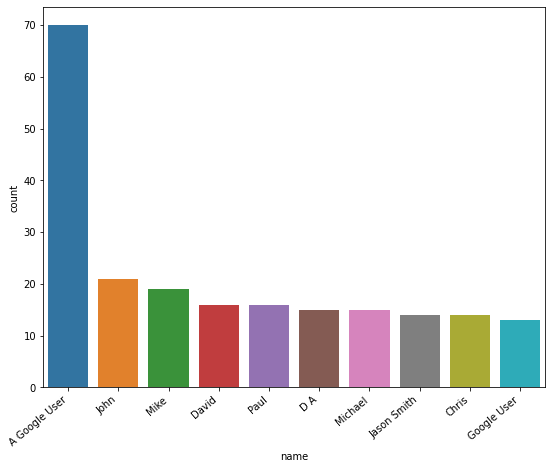

In [ ]:
plt.figure(figsize=(9,7)),
ax = sns.countplot(x= "name", data=df,order=df["name"].value_counts()[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

##### Text

In [ ]:
df.text.count()

79718

Cantidad de reseñas únicas

In [ ]:
len(df.text.unique())

69410

Reseñas que más se repiten

In [ ]:
df.text.value_counts()

Nice                                                                                                       215
Nice place                                                                                                 210
Great place                                                                                                209
Great                                                                                                      193
Ok                                                                                                         177
                                                                                                          ... 
I love this place. They have great deals, do good work, and are great to work with when booking a trip.      1
Preferred customer night! Great deals and great gear!                                                        1
They have the best staff for helping. I love my coat!!!                                                      1
T

Graficamos las 10 reseñas que más se repiten

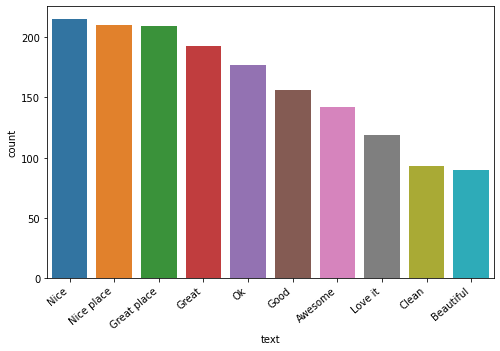

In [ ]:
plt.figure(figsize=(8,5)),
ax = sns.countplot(x= "text", data=df,order=df["text"].value_counts()[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

##### Resp

In [ ]:
df.name.count()

133023

In [ ]:
len(df.resp.unique())

10338

In [ ]:
df.resp.value_counts()

{'time': 1573036124921, 'text': 'Thanks for your review and please let us know what we could’ve done to get 5 stars.'}                                                                                                                                                                                                                                                                                                                                                                                                             4
{'time': 1516942567820, 'text': 'Ruth, thank you so much for taking the time to leave us a 5* review of our hotel on G+. We appreciate your feedback!'}                                                                                                                                                                                                                                                                                                                                            

La columna response contiene un 1 si se dio una respuesta al reviews y 0 si no se dio

Vemos el % de respuesta de los hoteles

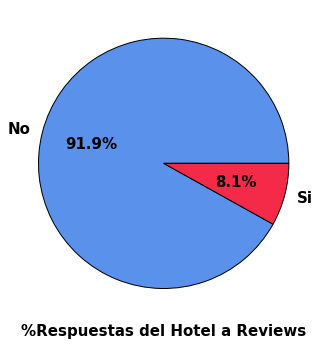

In [ ]:

plt.figure(figsize=(14, 5))
colors= ['#5991eb', '#f52a48']
ax=plt.pie(data=df, x=df.response.value_counts().values,labels =['No', 'Si'],
             colors = colors 
            , autopct='%.1f%%', wedgeprops = {"edgecolor" : "black",},
          textprops={'fontsize':15, 'weight':'bold'})

plt.xlabel('%Respuestas del Hotel a Reviews',fontsize=15,weight='bold')
plt.rcParams['font.size'] = 13.0
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()